In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import sys,os,numpy,pandas
import matplotlib.pyplot as plt
sys.path.append('/home/heyangle/Desktop/ScanCraft/ScanCraft')

from command.file_operations.GetDirectories import GetDirectories
from command.file_operations.GetSamples import GetSamples
from command.operators.iterable import FlatToList

In [2]:
from multiprocessing import Pool
from command.NMSSMTools import ReadNMSSMToolsSpectr as Read

def read_spectr(sample):
    setattr(sample,'spectr',Read(sample.documents['spectr'],
                                ignore=[ 'Landau Pole'#27
                                ,'Excluded by LUX'
                                ,'Relic density'
                                ,'Muon magn'#37
                                ,'b -> c tau nu'#58 always keep alive
                                ])
           )
    return sample

In [3]:
h1=GetSamples(path='./mcmc_h1/record/',patterns=['inp','spectr','omega'])
len(h1)

3501

In [4]:
h2=GetSamples(path='./mcmc_h2/record/',patterns=['inp','spectr','omega'])
len(h2)

3501

In [5]:
with Pool(6) as P:
    h1=P.map(read_spectr, h1)
with Pool(6) as P:
    h2=P.map(read_spectr, h2)

In [6]:
h1[0].documents['inp'].rsplit('.')

['/home/heyangle/Desktop/rerun_old_works/Fine_tuning/mcmc_h1/record/inp',
 'dat',
 '1']

In [7]:
h1[2].spectr.DELTAMH

{0: 832.4290306933239}

In [16]:
n_DhDz_h1=numpy.array([
    [int(x.documents['inp'].rsplit('.')[-1]),x.spectr.DELTAMH[0],x.spectr.FINETUNING[15]]
    for x in h1
])
n_DhDz_h2=numpy.array([
    [int(x.documents['inp'].rsplit('.')[-1]),x.spectr.DELTAMH[0],x.spectr.FINETUNING[15]]
    for x in h2
])

In [9]:
n_DhDz_h1

array([[1.00000000e+00, 9.05163102e+02, 1.47986785e+01],
       [2.00000000e+00, 4.12631368e+02, 3.05345476e+00],
       [3.00000000e+00, 8.32429031e+02, 2.70648978e+01],
       ...,
       [3.73700000e+03, 2.02751634e+01, 2.32075352e+01],
       [3.73800000e+03, 4.40832479e+01, 3.19053818e+01],
       [3.73900000e+03, 2.55863877e+01, 1.81564214e+01]])

In [17]:
n_DhDz_h2

array([[1.00000000e+00, 1.02806741e+01, 1.47986785e+01],
       [2.00000000e+00, 3.28187424e+00, 3.05345476e+00],
       [3.00000000e+00, 2.10348378e+01, 2.70648978e+01],
       ...,
       [3.73700000e+03, 1.07156770e+01, 2.32075352e+01],
       [3.73800000e+03, 7.00463477e+00, 3.19053818e+01],
       [3.73900000e+03, 3.00983043e+00, 1.81564214e+01]])

In [14]:
numpy.savetxt('Dh_Dz_h1.txt',n_DhDz_h1,fmt=('%8i','%20.10e','%20.10e'))

In [18]:
numpy.savetxt('Dh_Dz_h2.txt',n_DhDz_h2,fmt=('%8i','%20.10e','%20.10e'))

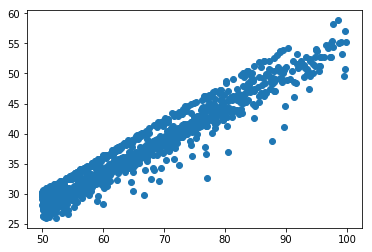

In [14]:
plt.scatter(DhDz_h1[:,0],DhDz_h1[:,1])

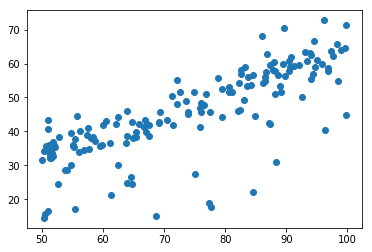

In [15]:
plt.scatter(DhDz_h2[:,0],DhDz_h2[:,1])